## Read csv file

In [1]:
import pandas as pd
df = pd.read_csv('../data/taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [3]:
df.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [4]:
df[df.isna().any(axis=1)]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN
993,NaN,Morning,Weekday,3.0,Medium,Clear,2.65,1.35,NaN,25.61,55.3348
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236


### Drop the `Passenger_Count` column because it does not significantly affect the target


In [5]:
df = df.drop('Passenger_Count', axis=1)
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,High,Clear,2.93,0.63,0.32,22.64,15.6180


### Scanning for missing Trip Distance values
We are identifying all records where the `Trip_Distance_km` is missing. Since distance is the primary factor in calculating a taxi fare, we need to ensure these values are filled. By isolating these rows, we can confirm we have the other pricing data needed to mathematically calculate the exact distance for these trips.

In [6]:
df[df['Trip_Distance_km'].isna()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
4,NaN,Evening,Weekday,High,Clear,2.93,0.63,0.32,22.64,15.6180
10,NaN,Morning,Weekday,NaN,Clear,2.40,0.58,0.43,26.34,14.8920
84,NaN,Night,Weekday,Medium,Clear,3.38,1.50,0.31,58.31,45.8161
87,NaN,NaN,Weekday,Medium,Clear,3.41,0.57,0.39,92.72,57.9476
95,NaN,Morning,Weekend,Medium,Clear,3.43,0.91,0.50,67.43,60.0770
111,NaN,Morning,Weekday,Low,Clear,4.01,1.65,0.17,109.77,37.3559
134,NaN,Afternoon,Weekend,Low,Clear,2.55,1.46,0.37,38.26,85.6182
137,NaN,NaN,NaN,Low,Clear,4.52,1.38,0.35,57.56,73.5870
142,NaN,Afternoon,Weekend,Medium,Rain,2.98,1.24,0.28,36.68,44.7092
166,NaN,Evening,Weekday,High,Clear,4.11,1.00,0.36,86.31,51.9016


### Drop rows where `Trip_Distance_km` and other key values are missing
These rows cannot be used for machine learning because `Trip_Distance_km` or other essential features are missing, so the trip price cannot be calculated accurately.


In [7]:
rows_to_remove = [366, 424, 770, 813, 993]
df = df.drop(rows_to_remove)

### Fill in missing Trip_Distance_km values by calculating them from other relevant trip details and rates

Trip_Price = Base_Fare
             + (Trip_Distance_km * Per_Km_Rate)
             + (Trip_Duration_Minutes * Per_Minute_Rate)

In [8]:
missing_count = df['Trip_Distance_km'].isna().sum()
print(f"Number of missing Trip_Distance_km values: {missing_count}")

df['Trip_Distance_km'] = df.apply(
    lambda row: (row['Trip_Price'] - row['Base_Fare'] - row['Per_Minute_Rate']*row['Trip_Duration_Minutes']) / row['Per_Km_Rate']
    if pd.isna(row['Trip_Distance_km']) else row['Trip_Distance_km'],
    axis=1
)

print(f"Number of missing Trip_Distance_km values after calculation: {df['Trip_Distance_km'].isna().sum()}")


Number of missing Trip_Distance_km values: 45
Number of missing Trip_Distance_km values after calculation: 1


In [180]:
df[df['Trip_Distance_km'].isna()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
734,NaN,Morning,Weekend,Low,Clear,3.14,NaN,0.14,89.47,34.4316


In [9]:
df = df.drop(734)

### Checking calculation results for row 970
We perform manual check using `.loc[970]` to confirm that our mathematical imputation for distance and fare is consistent across the dataset. This final spot-check gives us confidence that our data cleaning logic is robust before we proceed to model training.

In [16]:
df.loc[970]

Trip_Distance_km           33.52
Time_of_Day              Morning
Day_of_Week              Weekday
Traffic_Conditions          High
Weather                    Clear
Base_Fare                   3.97
Per_Km_Rate                 1.73
Per_Minute_Rate             0.19
Trip_Duration_Minutes      58.48
Trip_Price               73.0708
Name: 970, dtype: object

### Locating Missing Base Fare Values
We identify rows where the `Base_Fare` is missing. By isolating these records, we can confirm that the other necessary components of the pricing equation—specifically **Distance**, **Duration**, and **Rates**—are available. This ensures we can accurately impute the missing fare values using the standardized pricing formula before proceeding to the modeling phase.

In [183]:
df[df['Base_Fare'].isna()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,High,Clear,NaN,0.62,0.43,40.57,NaN
25,39.47,Afternoon,Weekday,Low,Clear,NaN,NaN,0.35,7.59,83.6965
43,45.56,Afternoon,Weekday,Low,Clear,NaN,0.90,0.50,80.80,85.8840
50,48.51,Evening,Weekday,High,Rain,NaN,1.00,0.48,110.18,104.1764
92,38.28,Afternoon,Weekday,Medium,Clear,NaN,1.08,0.39,51.33,63.5611
107,38.02,Evening,NaN,NaN,Clear,NaN,1.31,0.35,33.73,66.2817
109,4.77,Morning,Weekend,High,Clear,NaN,0.96,0.18,105.91,NaN
116,40.38,Morning,Weekday,Medium,Rain,NaN,0.80,0.23,115.21,63.4323
156,33.93,Morning,Weekday,Low,Rain,NaN,0.88,0.39,66.77,59.9287
158,12.64,Evening,Weekday,Medium,Clear,NaN,0.70,0.29,22.91,20.3819


### Dropping Irrecoverable Rows (Multiple Missing Values)
In these specific rows, both the `Base_Fare` and another critical numerical component (such as `Per_Km_Rate` or `Trip_Distance_km`) are missing simultaneously. 

Because we lack two parts of the pricing equation, we cannot mathematically solve for the missing values without guessing. To maintain the high integrity of our training data and avoid introducing "fake" noise, we are dropping these 11 rows from the dataset.

In [10]:
df = df.drop([1, 25, 109, 173, 201, 328, 397, 547, 728, 871, 937])

### Fill in missing Base_Fare values

Base_Fare = Trip_Price
            - (Trip_Distance_km * Per_Km_Rate)
            - (Trip_Duration_Minutes * Per_Minute_Rate)


In [11]:
missing_count = df['Base_Fare'].isna().sum()
print(f"Number of missing Base_Fare values: {missing_count}")

df['Base_Fare'] = df.apply(
    lambda row: row['Trip_Price']
    - (row['Trip_Distance_km'] * row['Per_Km_Rate'])
    - (row['Trip_Duration_Minutes'] * row['Per_Minute_Rate'])
    if pd.isna(row['Base_Fare']) else row['Base_Fare'],
    axis=1
)

print(f"Number of missing Base_Fare values after calculation: {df['Base_Fare'].isna().sum()}")

Number of missing Base_Fare values: 38
Number of missing Base_Fare values after calculation: 0


### Verification: Manual spot-check of row 953
We use `.loc[953]` to perform a manual check of our data. This allows us to confirm that all numerical values, including those we recovered via calculation, look realistic and are correctly formatted before we move to visualization and model training.

In [17]:
df.loc[953]

Trip_Distance_km           45.81
Time_of_Day              Evening
Day_of_Week              Weekday
Traffic_Conditions          High
Weather                    Clear
Base_Fare                   2.96
Per_Km_Rate                 1.41
Per_Minute_Rate             0.28
Trip_Duration_Minutes      26.73
Trip_Price               75.0365
Name: 953, dtype: object

### Scanning for missing Kilometer Rates
We are looking for rows that don't have a value in the `Per_Km_Rate` column. This is a **required first step** before we fix the data. Once we confirm we have the other three numbers (Price, Duration, and Base Fare), we can use our math formula to fill in the missing rate for these specific trips.

In [187]:
df[df['Per_Km_Rate'].isna()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
11,48.530000,Night,Weekday,Low,Clear,4.78,NaN,0.50,79.94,NaN
13,11.400000,Morning,Weekday,NaN,Clear,4.12,NaN,0.15,84.12,36.118000
38,34.530000,Morning,Weekday,Medium,Clear,3.58,NaN,0.26,59.14,60.047100
44,13.680000,Evening,Weekend,High,Clear,3.88,NaN,0.17,50.78,29.475800
46,16.270000,Morning,Weekday,Low,Clear,2.34,NaN,0.41,97.35,64.055300
56,5.340000,NaN,Weekday,Low,Clear,2.34,NaN,0.18,12.72,10.236600
57,10.600000,Afternoon,Weekday,Medium,Clear,4.21,NaN,0.30,73.28,32.342000
78,18.560000,Morning,Weekend,Medium,Snow,4.74,NaN,0.47,44.62,45.385000
147,25.630000,Afternoon,Weekday,Medium,Clear,4.21,NaN,0.18,15.48,54.155600
222,5.590000,Afternoon,Weekday,High,Clear,4.39,NaN,0.10,30.31,17.147600


### Removing rows with multiple missing values
In these specific cases, both the `Per_Km_Rate` and another important column are missing at the same time. Since we are missing too much information to solve the pricing math, it is **better to remove these rows** than to guess the numbers. This keeps our training data accurate and reliable.

In [12]:
df = df.drop([11, 263, 426, 555, 624, 631, 676, 966])

### Fill in missing Per_Km_Rate values

Per_Km_Rate = (Trip_Price - Base_Fare - (Trip_Duration_Minutes * Per_Minute_Rate)) / Trip_Distance_km

In [13]:
missing_count = df['Per_Km_Rate'].isna().sum()
print(f"Number of missing Per_Km_Rate values: {missing_count}")

df['Per_Km_Rate'] = df.apply(
    lambda row: (row['Trip_Price'] - row['Base_Fare'] - row['Trip_Duration_Minutes'] * row['Per_Minute_Rate']) / row['Trip_Distance_km']
    if pd.isna(row['Per_Km_Rate']) else row['Per_Km_Rate'],
    axis=1
)

print(f"Number of missing Per_Km_Rate values after calculation: {df['Per_Km_Rate'].isna().sum()}")


Number of missing Per_Km_Rate values: 40
Number of missing Per_Km_Rate values after calculation: 1


In [190]:
df[df['Per_Km_Rate'].isna()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
287,100.38042,Afternoon,Weekday,Medium,Rain,4.46,NaN,NaN,89.21,329.913004


In [14]:
df = df.drop([287])

### Verification: Quick check of the calculation

In [15]:
df.loc[56]

Trip_Distance_km            5.34
Time_of_Day                  NaN
Day_of_Week              Weekday
Traffic_Conditions           Low
Weather                    Clear
Base_Fare                   2.34
Per_Km_Rate                 1.05
Per_Minute_Rate             0.18
Trip_Duration_Minutes      12.72
Trip_Price               10.2366
Name: 56, dtype: object

### Listing records with missing Per Minute Rates
We are identifying all rows where the `Per_Minute_Rate` is missing (NaN). This scan allows us to verify that we have the other three variables—**Trip Price**, **Base Fare**, and **Kilometer costs**—required to mathematically calculate the missing minute rate for these specific trips.

In [18]:
df[df['Per_Minute_Rate'].isna()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
6,3.850000,Afternoon,Weekday,High,Rain,3.51,1.66,NaN,5.05,11.264500
39,22.570000,Afternoon,Weekday,Low,Clear,3.40,1.41,NaN,105.98,62.778500
89,24.140000,Morning,Weekday,Low,NaN,3.92,1.69,NaN,82.14,55.394800
125,21.930000,Afternoon,NaN,Low,NaN,4.53,0.76,NaN,74.52,48.024000
127,43.180000,Afternoon,Weekday,High,Clear,3.03,1.54,NaN,104.17,98.694800
149,14.650000,Evening,Weekend,High,Clear,3.74,1.79,NaN,29.58,40.020700
189,12.850000,Evening,Weekday,Low,Snow,3.94,0.61,NaN,26.63,23.495700
205,1.450000,Evening,Weekend,High,Clear,2.80,1.73,NaN,63.01,12.239600
235,36.400000,Afternoon,Weekday,Medium,Clear,4.05,1.34,NaN,117.94,94.105000
292,41.310000,Afternoon,Weekday,Medium,Clear,4.90,1.10,NaN,21.18,56.059600


### Drop rows where `Per_Minute_Rate` and other key values are missing

In [19]:
df = df.drop([504, 753, 935])

### Fill in missing Per_Minute_Rate values

Per_Minute_Rate =
(Trip_Price - Base_Fare - (Trip_Distance_km * Per_Km_Rate))
/ Trip_Duration_Minutes


In [20]:
missing_count = df['Per_Minute_Rate'].isna().sum()
print(f"Number of missing Per_Minute_Rate values: {missing_count}")

df['Per_Minute_Rate'] = df.apply(
    lambda row: (row['Trip_Price'] - row['Base_Fare'] - row['Trip_Distance_km'] * row['Per_Km_Rate'])
    / row['Trip_Duration_Minutes']
    if pd.isna(row['Per_Minute_Rate']) else row['Per_Minute_Rate'],
    axis=1
)

print(f"Number of missing Per_Minute_Rate values after calculation: {df['Per_Minute_Rate'].isna().sum()}")

Number of missing Per_Minute_Rate values: 45
Number of missing Per_Minute_Rate values after calculation: 0


Verifying calculation accuracy on a random sample

In [21]:
df.loc[205]

Trip_Distance_km            1.45
Time_of_Day              Evening
Day_of_Week              Weekend
Traffic_Conditions          High
Weather                    Clear
Base_Fare                    2.8
Per_Km_Rate                 1.73
Per_Minute_Rate             0.11
Trip_Duration_Minutes      63.01
Trip_Price               12.2396
Name: 205, dtype: object

### Identifying records with missing Trip_Duration_Minutes values
Before applying our mathematical imputation, we list all rows where `Trip_Duration_Minutes` is missing (NaN). This allows us to verify the scope of the missing data and ensures that the other variables required for the calculation (Price, Distance, and Rates) are present for these specific records.

In [22]:
df[df['Trip_Duration_Minutes'].isna()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
7,43.44,Evening,Weekend,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
9,35.70,Afternoon,Weekday,Low,Rain,3.39,1.52,0.47,NaN,75.5657
19,15.27,Morning,NaN,Low,Clear,3.93,0.73,0.12,NaN,27.3543
62,41.61,Evening,Weekend,Low,Rain,2.79,0.78,0.15,NaN,47.3148
98,2.25,Evening,Weekend,Low,Clear,3.99,1.88,0.50,NaN,40.6500
163,27.25,Evening,Weekend,Low,Rain,3.74,1.62,0.30,NaN,66.5660
177,19.95,Morning,Weekday,Low,NaN,2.50,0.88,0.49,NaN,NaN
182,46.31,Afternoon,Weekday,Medium,Rain,4.74,1.80,0.35,NaN,96.9390
188,26.95,Afternoon,Weekend,Low,Clear,2.44,1.32,0.22,NaN,44.7548
231,25.63,Morning,Weekday,High,Clear,3.06,0.84,0.16,NaN,39.0660


### Drop rows where `Trip_Duration_Minutes` and other key values are missing

In [23]:
df = df.drop([177, 262, 579, 889])

### Fill in missing Trip_Duration_Minutes values

Trip_Duration_Minutes =
(Trip_Price - Base_Fare - (Trip_Distance_km * Per_Km_Rate))
/ Per_Minute_Rate


In [24]:
missing_count = df['Trip_Duration_Minutes'].isna().sum()
print(f"Number of missing Trip_Duration_Minutes values: {missing_count}")

df['Trip_Duration_Minutes'] = df.apply(
    lambda row: (row['Trip_Price'] - row['Base_Fare'] - row['Trip_Distance_km'] * row['Per_Km_Rate'])
    / row['Per_Minute_Rate']
    if pd.isna(row['Trip_Duration_Minutes']) else row['Trip_Duration_Minutes'],
    axis=1
)

print(
    f"Number of missing Trip_Duration_Minutes values after calculation: "
    f"{df['Trip_Duration_Minutes'].isna().sum()}"
)

Number of missing Trip_Duration_Minutes values: 35
Number of missing Trip_Duration_Minutes values after calculation: 0


Verifying calculation accuracy on a random sample

In [25]:
df.loc[638]

Trip_Distance_km           14.19
Time_of_Day                Night
Day_of_Week              Weekend
Traffic_Conditions        Medium
Weather                    Clear
Base_Fare                   3.91
Per_Km_Rate                  1.5
Per_Minute_Rate             0.32
Trip_Duration_Minutes      60.35
Trip_Price                44.507
Name: 638, dtype: object

### Isolating the "Unknown" Target Rows
We filter the dataset to identify all records where the `Trip_Price` is missing (NaN). These 32 rows represent our **Prediction Set**; while we have all the trip details (Distance, Weather, Traffic, etc.), the price is unknown. We will use our trained model later in the project to predict these specific values.

In [26]:
df[df['Trip_Price'].isna()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
8,30.45,Morning,Weekday,High,Clear,2.77,1.78,0.34,110.33,NaN
32,4.19,Morning,Weekday,Low,Clear,4.07,1.89,0.19,69.06,NaN
94,38.78,Morning,Weekday,Medium,Clear,3.08,1.62,0.15,90.14,NaN
122,16.58,Evening,NaN,Low,Clear,4.46,1.23,0.16,62.79,NaN
167,10.14,Afternoon,Weekday,Low,Rain,4.50,1.62,0.38,25.41,NaN
178,46.90,Evening,Weekday,High,Clear,4.14,1.33,0.13,66.38,NaN
207,33.51,Afternoon,Weekend,Low,Clear,2.31,1.32,0.40,62.87,NaN
212,32.95,Morning,Weekday,Medium,Clear,3.36,1.56,0.19,81.37,NaN
214,35.90,NaN,Weekend,High,Clear,4.03,1.79,0.13,107.25,NaN
228,44.71,Night,Weekday,Low,Rain,2.50,1.94,0.47,45.94,NaN


### Final Feature Selection: Removing Redundant Formula Columns
Now that we have used the `Base_Fare`, `Per_Km_Rate`, and `Per_Minute_Rate` to successfully impute (fill in) missing values for `Trip_Distance_km` and `Trip_Price`, these columns are no longer needed.

**Reasoning for dropping these columns:**
* **Preventing Data Leakage**: These columns are parts of the mathematical formula used to calculate the price. Including them would allow the model to "cheat" by learning a simple equation rather than discovering complex patterns in the data.
* **Simplification**: Our goal is to predict the price based on external factors (Weather, Time of Day, Traffic) rather than internal pricing rates.
* **Multicollinearity**: These columns are perfectly correlated with the target variable, which can confuse many regression models.

This step leaves us with the finalized set of features for Machine Learning Model Development.

In [27]:
df = df.drop(['Base_Fare','Per_Km_Rate','Per_Minute_Rate'], axis=1)
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,Low,Clear,53.82,36.2624
2,36.87,Evening,Weekend,High,Clear,37.27,52.9032
3,30.33,Evening,Weekday,Low,NaN,116.81,36.4698
4,8.64,Evening,Weekday,High,Clear,22.64,15.6180
5,8.64,Afternoon,Weekend,Medium,Clear,89.33,60.2028


### Split dataset by target availability

- `df_known`: rows with `Trip_Price` available → used for training  
- `df_unknown`: rows with `Trip_Price` missing → used for prediction
- `.copy()` is used to **avoid modifying the original DataFrame** when we fill missing values later

In [28]:
df_known = df[df["Trip_Price"].notna()].copy()
df_unknown = df[df["Trip_Price"].isna()].copy()

In [32]:
df_known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       935 non-null    float64
 1   Time_of_Day            886 non-null    object 
 2   Day_of_Week            889 non-null    object 
 3   Traffic_Conditions     886 non-null    object 
 4   Weather                889 non-null    object 
 5   Trip_Duration_Minutes  935 non-null    float64
 6   Trip_Price             935 non-null    float64
dtypes: float64(3), object(4)
memory usage: 51.3+ KB


In [33]:
df_unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       32 non-null     float64
 1   Time_of_Day            31 non-null     object 
 2   Day_of_Week            30 non-null     object 
 3   Traffic_Conditions     32 non-null     object 
 4   Weather                30 non-null     object 
 5   Trip_Duration_Minutes  32 non-null     float64
 6   Trip_Price             0 non-null      float64
dtypes: float64(3), object(4)
memory usage: 1.9+ KB


### Resetting the DataFrame index to ensure contiguous row numbering

In [31]:
df_known = df_known.reset_index(drop=True)
df_unknown = df_unknown.reset_index(drop=True)

### Visualizing Gaps in the Prediction Set
We filter the `df_unknown` dataframe to isolate rows that have missing values in any column except `Trip_Price`. This specific check allows us to see exactly which categorical features—such as `Time_of_Day`, `Day_of_Week`, or `Weather`—need attention before we move to the encoding phase. 


In [39]:
df_unknown[df_unknown.drop(columns=['Trip_Price']).isna().any(axis=1)]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
3,16.58,Evening,NaN,Low,Clear,62.79,NaN
8,35.90,NaN,Weekend,High,Clear,107.25,NaN
16,5.09,Afternoon,Weekday,Low,NaN,71.35,NaN
27,41.68,Evening,NaN,Medium,Rain,32.07,NaN
29,43.55,Afternoon,Weekday,Low,NaN,111.30,NaN


### Reasoning: Why These Rows Are Retained
While these 5 rows have missing categorical information, I have decided **not to delete them** for the following reasons:

* **Preserving the Target Set**: The `df_unknown` set consists of only 32 total rows that we are required to predict. Deleting these would result in a significant loss of our final output.
* **Predictive Strength**: All 5 rows still contain critical numerical data, such as `Trip_Distance_km` and `Trip_Duration_Minutes`, which are the strongest predictors of price.
* **Robust Imputation**: By filling these gaps with the label **"Unknown"**, we allow the model to process the records without making biased guesses about the weather or time, ensuring we fulfill the requirement to predict all 32 prices.

### Imputing Categorical Gaps with "Unknown" Labels
For our prediction set (`df_unknown`), some rows are missing categorical information such as `Time_of_Day`, `Day_of_Week`, or `Weather`. 

Instead of deleting these rows—which we need for our final predictions—we fill the missing values with the label **"Unknown"**. This approach ensures:
* **No Row Loss**: We can still generate a price prediction for these trips.
* **Model Compatibility**: Prevents errors during the encoding and prediction phases.
* **Neutrality**: We avoid introducing bias by not "guessing" the weather or the day.

In [40]:
for col in ["Time_of_Day", "Day_of_Week", "Weather"]:
    df_unknown[col] = df_unknown[col].fillna("Unknown")

Verifying the "Unknown" Label Imputation

In [45]:
df_unknown.loc[[3,8,16,27,29]]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
3,16.58,Evening,Unknown,Low,Clear,62.79,NaN
8,35.90,Unknown,Weekend,High,Clear,107.25,NaN
16,5.09,Afternoon,Weekday,Low,Unknown,71.35,NaN
27,41.68,Evening,Unknown,Medium,Rain,32.07,NaN
29,43.55,Afternoon,Weekday,Low,Unknown,111.30,NaN


### Check value counts for categorical columns


In [46]:
for col in ["Time_of_Day", "Day_of_Week", "Weather"]:
    print(df_unknown[col].value_counts())


Time_of_Day
Afternoon    14
Morning      10
Evening       5
Night         2
Unknown       1
Name: count, dtype: int64
Day_of_Week
Weekday    21
Weekend     9
Unknown     2
Name: count, dtype: int64
Weather
Clear      22
Rain        7
Unknown     2
Snow        1
Name: count, dtype: int64


### Missing Value Audit
We use `isna().sum()` to count exactly how many missing values remain in each column. This gives us a clear overview of the data's current state before we move to the next step.

In [47]:
df_known.isna().sum()


Trip_Distance_km          0
Time_of_Day              49
Day_of_Week              46
Traffic_Conditions       49
Weather                  46
Trip_Duration_Minutes     0
Trip_Price                0
dtype: int64

### Fill missing categorical values in training dataset


In [48]:
for col in ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]:
    df_known[col] = df_known[col].fillna("Unknown")


In [49]:
for col in ["Time_of_Day", "Day_of_Week","Traffic_Conditions", "Weather"]:
    print(df_known[col].value_counts())

Time_of_Day
Afternoon    346
Morning      258
Evening      194
Night         88
Unknown       49
Name: count, dtype: int64
Day_of_Week
Weekday    610
Weekend    279
Unknown     46
Name: count, dtype: int64
Traffic_Conditions
Low        368
Medium     348
High       170
Unknown     49
Name: count, dtype: int64
Weather
Clear      623
Rain       212
Snow        54
Unknown     46
Name: count, dtype: int64


### Evaluating "Unknown" Category Frequency
We use `value_counts()` to see how many rows are labeled as "Unknown" across our categorical features. 

**Key Findings:**
* Approximately **5% of our data** (around 46-49 rows per category) contains "Unknown" labels.
* Instead of deleting these rows, we keep them to maintain a larger dataset for the model to learn from.
* This ensures the model is "robust," meaning it can still make a good price prediction even when specific details like the weather are missing.

### Visualizing Outliers Before Cleaning

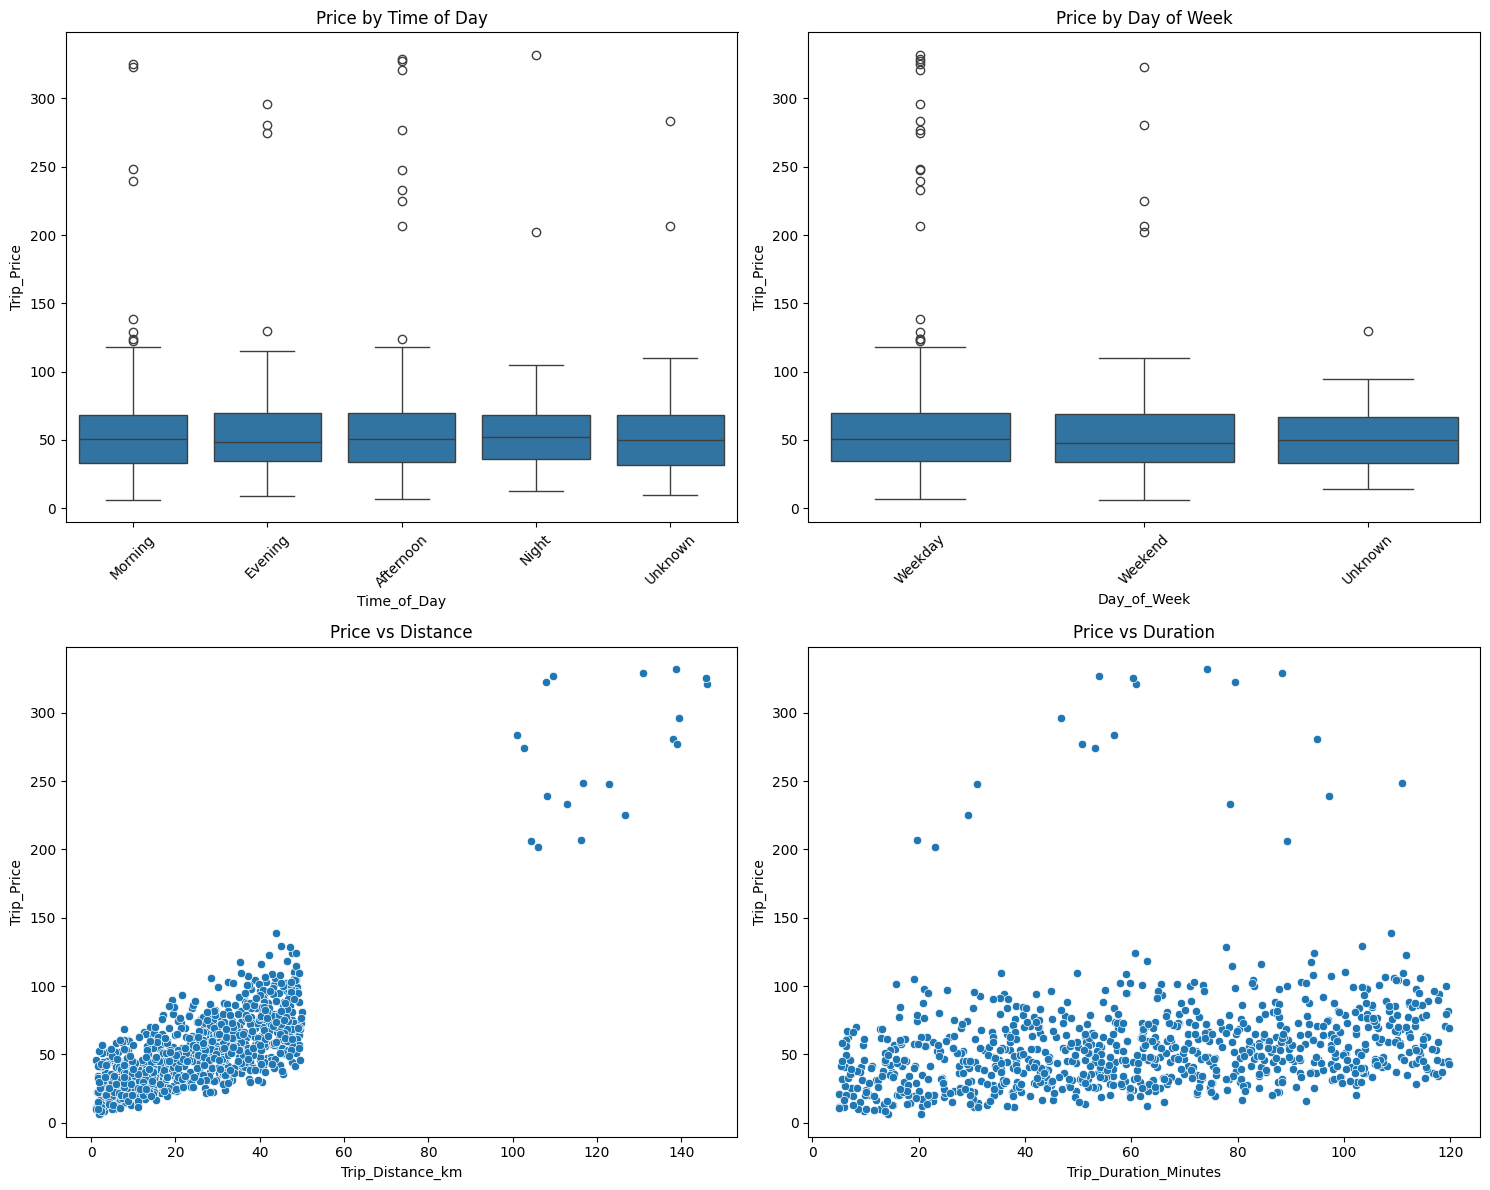

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Boxplot for Time of Day
sns.boxplot(ax=axes[0, 0], x="Time_of_Day", y="Trip_Price", data=df_known)
axes[0, 0].set_title("Price by Time of Day")
axes[0, 0].tick_params(axis='x', labelrotation=45)

# 2. Boxplot for Day of Week
sns.boxplot(ax=axes[0, 1], x="Day_of_Week", y="Trip_Price", data=df_known)
axes[0, 1].set_title("Price by Day of Week")
axes[0, 1].tick_params(axis='x', labelrotation=45)

# 3. Scatter for Distance
sns.scatterplot(ax=axes[1, 0], x="Trip_Distance_km", y="Trip_Price", data=df_known)
axes[1, 0].set_title("Price vs Distance")

# 4. Scatter for Duration
sns.scatterplot(ax=axes[1, 1], x="Trip_Duration_Minutes", y="Trip_Price", data=df_known)
axes[1, 1].set_title("Price vs Duration")

plt.tight_layout()
plt.show()


### Outlier Detection using Interquartile Range (IQR)
To ensure the model is not skewed by extreme pricing anomalies, we calculate the statistical **Upper Bound** using the IQR method.

In [51]:
upper_bound = df_known["Trip_Price"].quantile(0.75) + 1.5 * (df_known["Trip_Price"].quantile(0.75) - df_known["Trip_Price"].quantile(0.25))

outliers = df_known[df_known["Trip_Price"] > upper_bound]
print(outliers)
print("Number of high-priced outliers:", len(outliers))


     Trip_Distance_km Time_of_Day Day_of_Week Traffic_Conditions  Weather  \
19         105.943550       Night     Weekend                Low     Rain   
23         138.098328     Evening     Weekend             Medium     Rain   
59         146.067047   Afternoon     Weekday             Medium    Clear   
102        112.830958   Afternoon     Weekday               High     Snow   
103        102.747556     Evening     Weekday             Medium    Clear   
133        109.616082   Afternoon     Weekday               High    Clear   
209        130.809001   Afternoon     Weekday               High    Clear   
246        116.196064   Afternoon     Weekend             Medium    Clear   
247        139.062230   Afternoon     Weekday                Low     Rain   
277        145.747060     Morning     Weekday               High     Rain   
312        116.667681     Morning     Weekday               High    Clear   
381        104.371791     Unknown     Weekday                Low     Rain   

### Filtering out extreme trips (outliers)

removing extreme cases to prevent the model from overfitting to "junk" data or rare long-distance trips.

In [54]:
df_known_cleaned = df_known[
    (df_known['Trip_Distance_km'] <= 50) &
    (df_known['Trip_Price'] <= 150)
]


### Visualizing Anomalies & Data Distribution

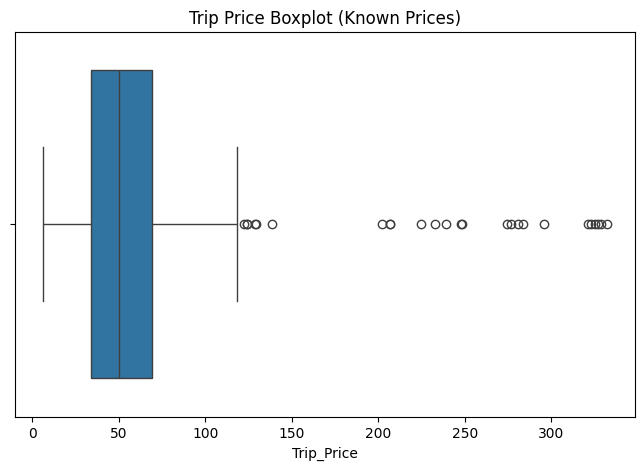

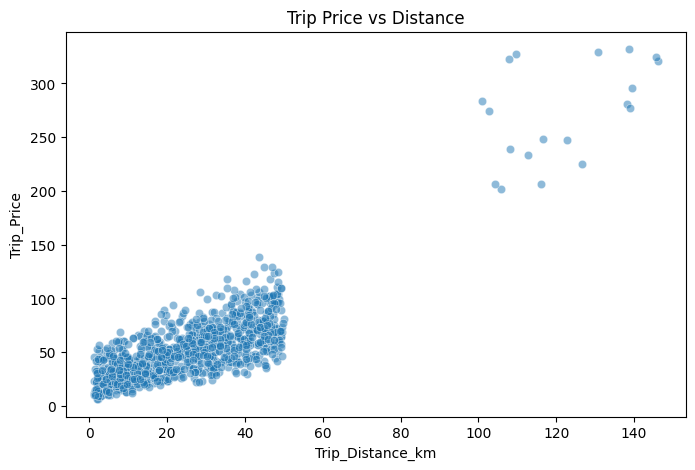

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to spot outliers in Trip_Price
plt.figure(figsize=(8,5))
sns.boxplot(x=df_known['Trip_Price'])
plt.title("Trip Price Boxplot (Known Prices)")
plt.show()

# Scatterplot for price vs distance
plt.figure(figsize=(8,5))
sns.scatterplot(x='Trip_Distance_km', y='Trip_Price', data=df_known, alpha=0.5)
plt.title("Trip Price vs Distance")
plt.show()


### Verify

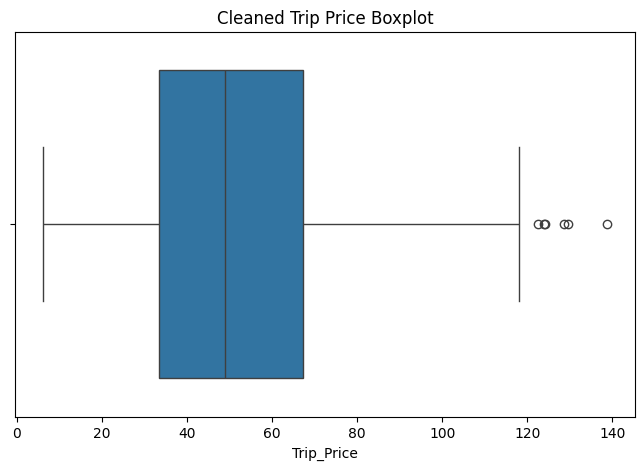

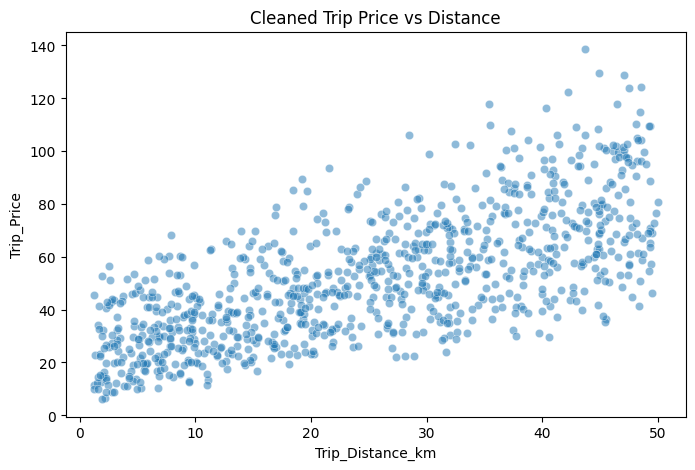

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Trip_Price
plt.figure(figsize=(8,5))
sns.boxplot(x=df_known_cleaned['Trip_Price'])
plt.title("Cleaned Trip Price Boxplot")
plt.show()

# Scatterplot for Trip_Price vs Trip_Distance_km
plt.figure(figsize=(8,5))
sns.scatterplot(x='Trip_Distance_km', y='Trip_Price', data=df_known_cleaned, alpha=0.5)
plt.title("Cleaned Trip Price vs Distance")
plt.show()


In [218]:
df_known_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 0 to 934
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       916 non-null    float64
 1   Time_of_Day            916 non-null    object 
 2   Day_of_Week            916 non-null    object 
 3   Traffic_Conditions     916 non-null    object 
 4   Weather                916 non-null    object 
 5   Trip_Duration_Minutes  916 non-null    float64
 6   Trip_Price             916 non-null    float64
dtypes: float64(3), object(4)
memory usage: 57.2+ KB


### Log-Transform Target Variable


In [221]:
import numpy as np

df_known_cleaned.loc[:, "Trip_Price_log"] = np.log1p(df_known_cleaned["Trip_Price"])
df_known_cleaned.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price,Trip_Price_log
0,19.35,Morning,Weekday,Low,Clear,53.82,36.2624,3.617985
1,36.87,Evening,Weekend,High,Clear,37.27,52.9032,3.987190
2,30.33,Evening,Weekday,Low,Unknown,116.81,36.4698,3.623535
3,8.64,Evening,Weekday,High,Clear,22.64,15.6180,2.810486
4,8.64,Afternoon,Weekend,Medium,Clear,89.33,60.2028,4.114193


### Encode categorical features

In [226]:
df_known_encoded = pd.get_dummies(
    df_known_cleaned, 
    columns=["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"], 
    drop_first=True,
    dtype=float  # This skips the boolean step entirely!
)

df_unknown_encoded = pd.get_dummies(
    df_unknown, 
    columns=["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"], 
    drop_first=True,
    dtype=float
)

In [227]:
df_unknown_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           32 non-null     float64
 1   Trip_Duration_Minutes      32 non-null     float64
 2   Trip_Price                 0 non-null      float64
 3   Time_of_Day_Evening        32 non-null     float64
 4   Time_of_Day_Morning        32 non-null     float64
 5   Time_of_Day_Night          32 non-null     float64
 6   Time_of_Day_Unknown        32 non-null     float64
 7   Day_of_Week_Weekday        32 non-null     float64
 8   Day_of_Week_Weekend        32 non-null     float64
 9   Traffic_Conditions_Low     32 non-null     float64
 10  Traffic_Conditions_Medium  32 non-null     float64
 11  Weather_Rain               32 non-null     float64
 12  Weather_Snow               32 non-null     float64
 13  Weather_Unknown            32 non-null     float64
d

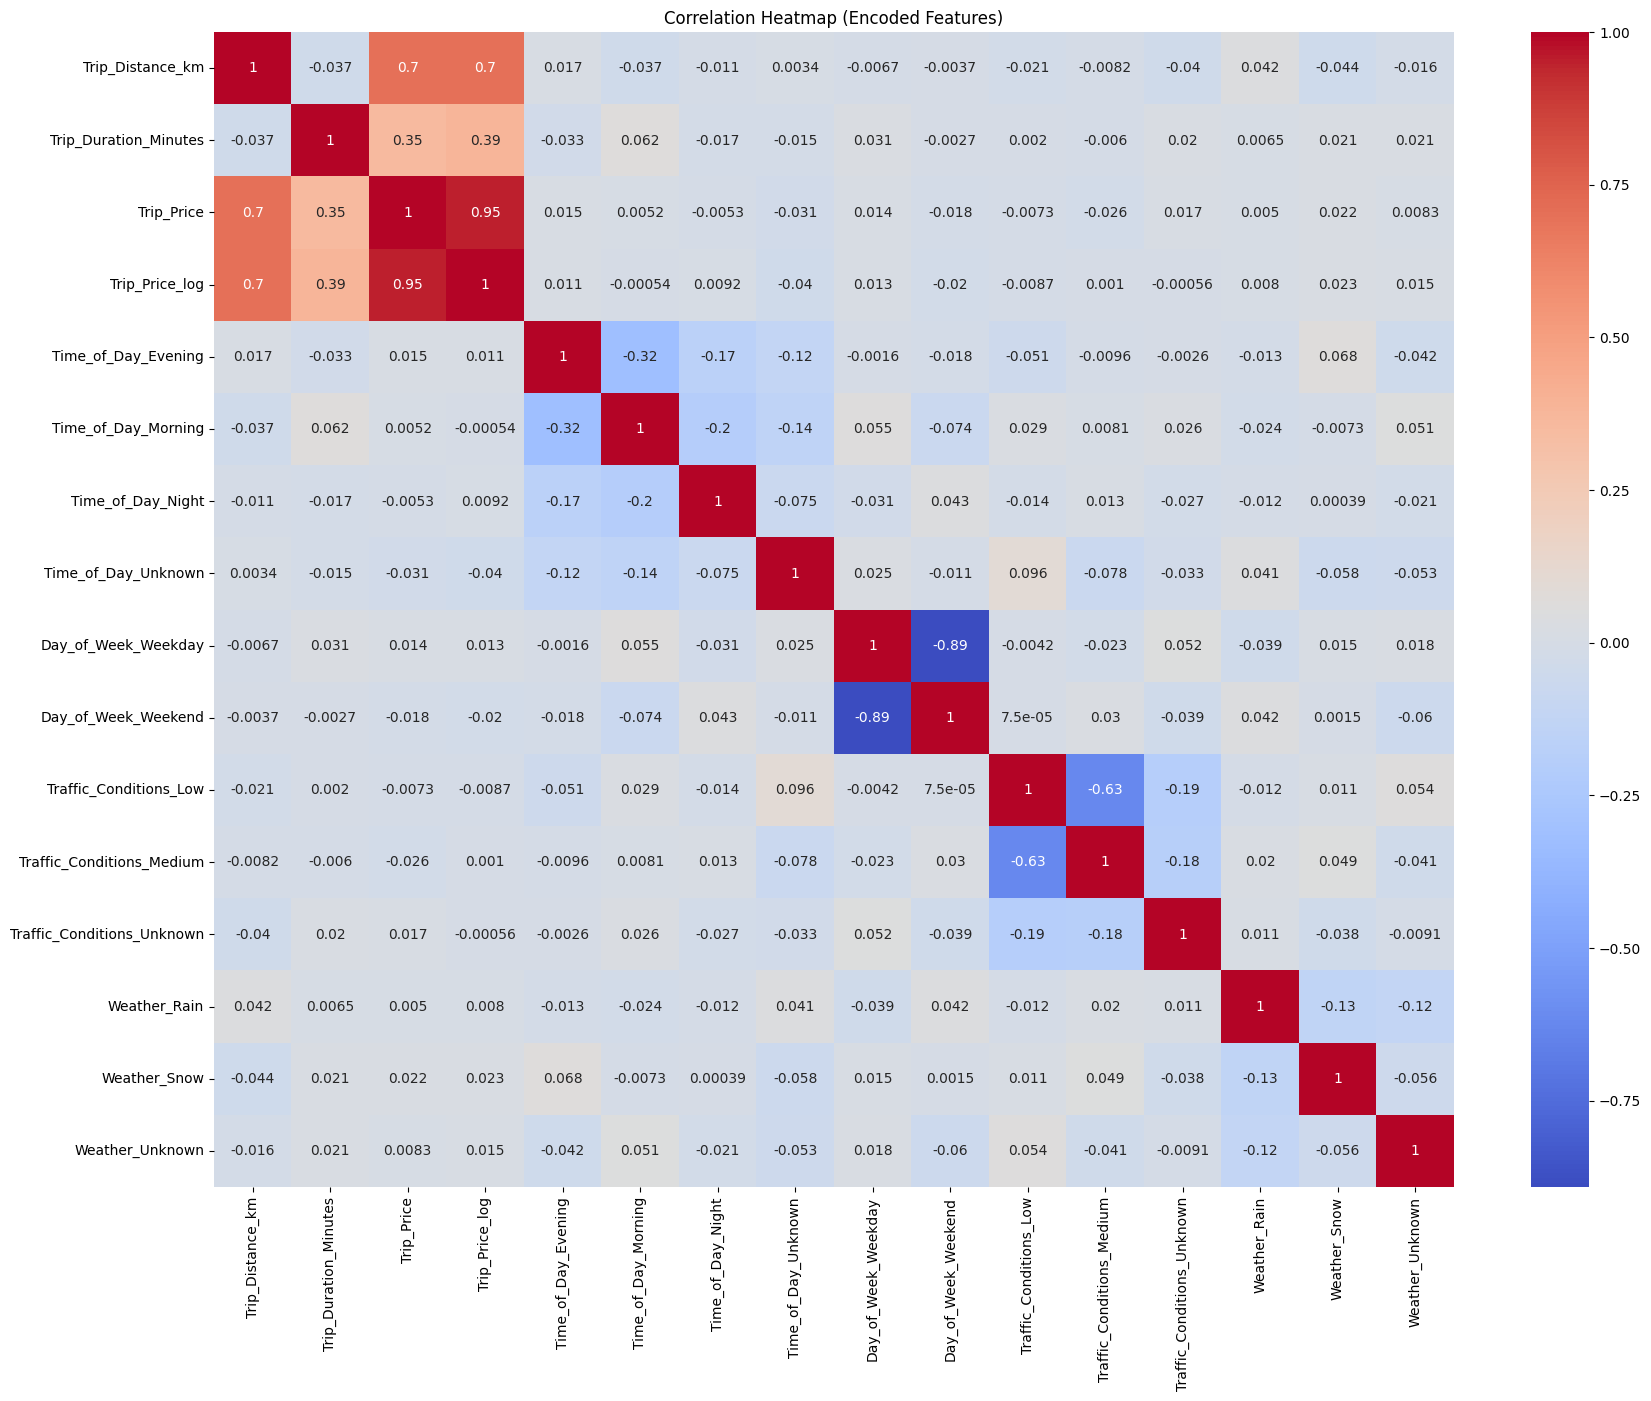

In [ ]:
plt.figure(figsize=(20,15))  # wider and taller
sns.heatmap(df_known_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Encoded Features)")
plt.show()

In [230]:
missing_cols = set(df_known_encoded.columns) - set(df_unknown_encoded.columns)

for col in missing_cols:
    if col not in ["Trip_Price", "Trip_Price_log"]:
        df_unknown_encoded[col] = 0.0

features = [c for c in df_known_encoded.columns if c not in ["Trip_Price", "Trip_Price_log"]]
df_unknown_final = df_unknown_encoded[features]

print(f"Alignment complete. Both datasets now use these {len(features)} features.")

Alignment complete. Both datasets now use these 14 features.


### Export data

In [231]:
df_known_encoded.to_csv("df_train.csv", index=False)
df_unknown_encoded.to_csv("df_predict.csv", index=False)